In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
filepath = "RELIANCE_2010-01-012021-08-30.csv"
data = pd.read_csv(filepath, usecols=[0,4], names=['date', 'close'], header=0)
data = data.sort_values('date')
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,close
0,2010-01-04,1075.50
1,2010-01-05,1070.70
2,2010-01-06,1088.00
3,2010-01-07,1106.05
4,2010-01-08,1103.15


In [21]:
#Previous value 48 is 24 hours/1 day, 2 observations are recorded hourly, each at 30 minute.
data['MA20'] = data['close'].rolling(20).mean()
data['MA100'] = data['close'].rolling(100).mean()

In [10]:
# data['timestamp'].loc[::500]

(array([16801., 16983., 17167., 17348., 17532., 17713., 17897., 18078.,
        18262.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

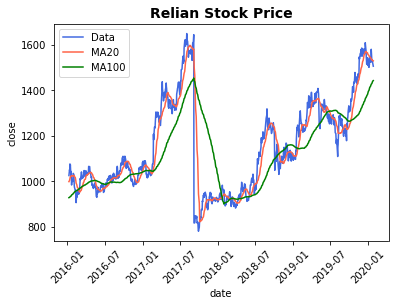

In [23]:
fig = plt.figure()

ax = sns.lineplot(x = data['date'][1500:2500], y = data['close'][1500:2500], label="Data", color='royalblue')
ax = sns.lineplot(x = data['date'][1500:2500], y = data['MA20'][1500:2500], label="MA20", color='tomato')
ax = sns.lineplot(x = data['date'][1500:2500], y = data['MA100'][1500:2500], label="MA100", color='green')
ax.set_title('Relian Stock Price', size = 14, fontweight='bold')
# plt.ylabel('Close Price (INR)',fontsize=18)
plt.xticks(rotation=45)

In [24]:
# drop moving-average columns
data.drop(['MA20', 'MA100'], axis=1, inplace=True)

# set timestamp to index
data.set_index('date', drop=True, inplace=True)



In [26]:
# resample timeseries to hourly 
# data = data.resample('H').sum()

# creature features from date
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
# data['hour'] = [i.hour for i in data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]
data[:15]

,close,day,day_name,day_of_year,week_of_year,is_weekday
date,,,,,,
2010-01-04,1075.50,4,Monday,4,1,1
2010-01-05,1070.70,5,Tuesday,5,1,2
2010-01-06,1088.00,6,Wednesday,6,1,3
2010-01-07,1106.05,7,Thursday,7,1,4
2010-01-08,1103.15,8,Friday,8,1,5
2010-01-11,1081.50,11,Monday,11,2,1
2010-01-12,1084.35,12,Tuesday,12,2,2
2010-01-13,1088.60,13,Wednesday,13,2,3
2010-01-14,1121.70,14,Thursday,14,2,4


In [27]:
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(2895, 6)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2895, 18)"
9,CPU Jobs,-1


In [28]:
# check list of available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [39]:
# train model
iforest = create_model('iforest', fraction = 0.1)
iforest_results = assign_model(iforest)
type(iforest_results)

pandas.core.frame.DataFrame

In [30]:
# check anomalies
iforest_results[iforest_results['Anomaly'] == 1]

,close,day,day_name,day_of_year,week_of_year,is_weekday,Anomaly,Anomaly_Score
date,,,,,,,,
2010-02-06,993.75,6,Saturday,37,5,6,1,0.027699
2010-12-27,1055.25,27,Monday,361,52,1,1,0.009387
2010-12-28,1047.90,28,Tuesday,362,52,2,1,0.007700
2010-12-29,1048.60,29,Wednesday,363,52,3,1,0.000557
2010-12-30,1051.20,30,Thursday,364,52,4,1,0.000013
...,...,...,...,...,...,...,...,...
2021-08-02,2072.50,2,Monday,214,31,1,1,0.014819
2021-08-03,2087.75,3,Tuesday,215,31,2,1,0.001449
2021-08-06,2089.05,6,Friday,218,31,5,1,0.000015


In [45]:
iforest_results

,date,close,day,day_name,day_of_year,week_of_year,is_weekday,Anomaly,Anomaly_Score
0,2010-01-04,1075.50,4,Monday,4,1,1,0,-0.010663
1,2010-01-05,1070.70,5,Tuesday,5,1,2,0,-0.013049
2,2010-01-06,1088.00,6,Wednesday,6,1,3,0,-0.020973
3,2010-01-07,1106.05,7,Thursday,7,1,4,0,-0.007912
4,2010-01-08,1103.15,8,Friday,8,1,5,0,-0.015648
...,...,...,...,...,...,...,...,...,...
2890,2021-08-23,2162.35,23,Monday,235,34,1,1,0.001289
2891,2021-08-24,2183.70,24,Tuesday,236,34,2,0,-0.002787
2892,2021-08-25,2202.60,25,Wednesday,237,34,3,0,-0.006601
2893,2021-08-26,2230.45,26,Thursday,238,34,4,0,-0.001108


In [41]:
iforest_results.reset_index(inplace=True)

,date,close
0,2010-02-06,993.75
1,2010-12-27,1055.25
2,2010-12-28,1047.90
3,2010-12-29,1048.60
4,2010-12-30,1051.20


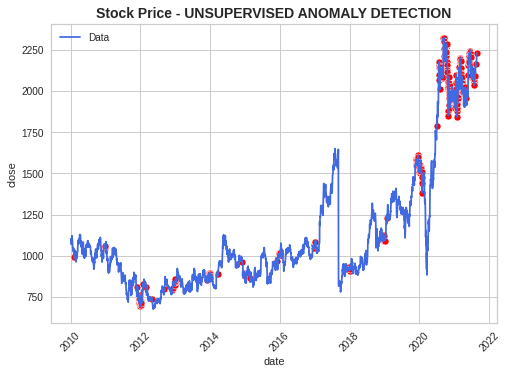

In [49]:
# plot value on y-axis and date on x-axis

fig = plt.figure()

ax = sns.lineplot(data = iforest_results, x = 'date', y = 'close', label="Data", color='royalblue')
ax.set_title('Stock Price - UNSUPERVISED ANOMALY DETECTION', size = 14, fontweight='bold')
plt.xticks(rotation=45)


iforest_results.set_index('date', inplace=True)

# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index



# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i]['close'] for i in outlier_dates]

anomalies_dict = {'date':outlier_dates, 'close':y_values}

anomalies_df = pd.DataFrame(anomalies_dict)
anomalies_df.set_index('date')

ax = sns.scatterplot(data=anomalies_df, x="date", y="close", color="red")
# anomalies_df.head()